In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("Ames_Final_DF.csv")

In [3]:
y = df['SalePrice']
X = df.drop('SalePrice',axis=1)

In [4]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree =2, include_bias = False)
polynomial_converter

PolynomialFeatures(include_bias=False)

In [5]:
#convert "fits" to data , in this case reads in every X columns
#then it "transform" and output the new polynomial data

poly_features = polynomial_converter.fit_transform(X)

In [6]:
poly_features.shape

(2904, 33929)

In [7]:
X.shape #Lets compare the original features shape(row,columns)

(2904, 259)

# train | test Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features,y,test_size=0.3,random_state=101)

In [9]:
X_train

array([[1.600e+02, 3.500e+01, 3.768e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.000e+01, 5.700e+01, 7.677e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [6.000e+01, 6.800e+01, 8.935e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.000e+01, 8.200e+01, 9.488e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.200e+02, 4.400e+01, 3.843e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.000e+01, 9.000e+01, 1.575e+04, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [10]:
X_test

array([[2.00000000e+01, 7.52106667e+01, 1.07100000e+04, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.00000000e+01, 4.00000000e+01, 5.43600000e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.00000000e+01, 7.06698113e+01, 8.88300000e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.00000000e+01, 4.50000000e+01, 7.50600000e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.00000000e+01, 7.06698113e+01, 9.45300000e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+01, 5.40000000e+01, 1.38110000e+04, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

# Model Fitting

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)

In [12]:
model.fit(X_train,y_train)

LinearRegression()

In [13]:
test_predictions=model.predict(X_test)

In [14]:
test_predictions

array([ 4.51299405e+05,  1.19387524e+05,  3.27300657e+05,  1.87058118e+05,
        9.50715348e+04, -9.64150810e+04,  2.42448005e+05,  1.72898153e+05,
        1.70862908e+05,  2.75006692e+05,  1.91434341e+05,  1.00286468e+05,
        2.70543614e+05, -5.49362913e+04,  2.57779391e+04,  1.49035084e+05,
        3.02567121e+04,  2.94128591e+05,  4.04161379e+05,  2.90522874e+05,
        2.41853046e+05,  6.52580817e+04,  1.93754633e+05,  2.65398482e+05,
       -1.25596172e+04, -1.05889192e+05,  1.56032742e+05,  1.61939239e+05,
        1.88356729e+05,  2.10723443e+05,  1.76109963e+05,  2.35649112e+05,
        2.58498588e+05,  1.09167420e+05,  5.54978678e+04,  2.10849017e+05,
       -5.86788653e+03,  1.36842352e+05,  1.24472398e+05,  1.07789554e+05,
       -2.80719866e+04,  2.29266971e+05,  1.24561799e+05,  2.67498309e+05,
        2.72655686e+05,  4.20552825e+06,  1.85049700e+05,  9.67318001e+04,
        2.11923518e+05,  2.31776198e+05,  1.36879462e+05,  8.91402225e+03,
        2.44468046e+05,  

# Evaluation

1. RMSE

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [16]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [17]:
RMSE

331367.3470226897

In [18]:
df['SalePrice'].mean()

179875.34917355372

In [19]:
RMSE/df['SalePrice'].mean()

1.842205441408028

2. Residual Plot

In [20]:
test_predictions=model.predict(X_test)
test_res=y_test-test_predictions

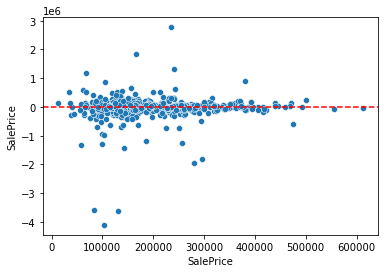

In [21]:
sns.scatterplot(x =y_test,y=test_res)
plt.axhline(y=0,color='r',linestyle ='--') 

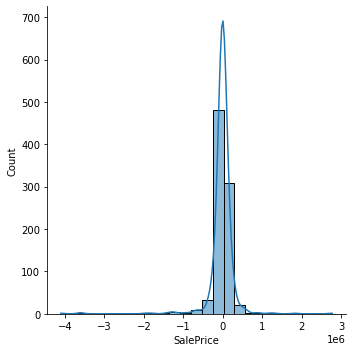

In [23]:
sns.displot(test_res,bins=25,kde=True)

3. Probability Plot

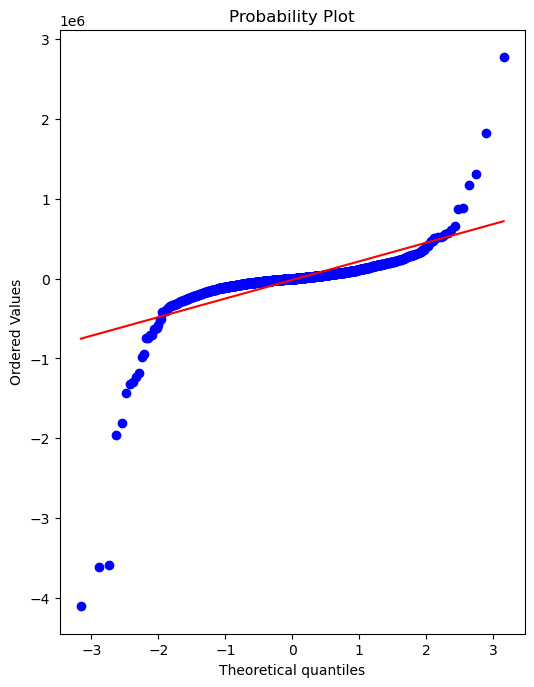

In [24]:
import scipy as sp

#create a figure and axis to plot on
fig,ax=plt.subplots(figsize=(6,8),dpi=100)

#probplot returns the raw values if needed
#we just want to see the plot,so we assign these value to _
_ =sp.stats.probplot(test_res,plot=ax)